In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import (
    HypervolumeMetric,
    GenerationalDistanceMetric,
    EpsilonIndicatorMetric,
    InvertedGenerationalDistanceMetric,
    SpacingMetric,
)
from ema_workbench.em_framework.optimization import to_problem
from ema_workbench.em_framework.optimization import ArchiveLogger

# Load all convergence metrics and archives
convergence_dfs = []
archives = {}

for i in range(5):
    convergence_dfs.append(pd.read_csv(f'db_convergence_metrics_{i}.csv'))
    archive = ArchiveLogger.load_archives(f"./archives/{i}.tar.gz")
    for key in archive:
        if key not in archives:
            archives[key] = archive[key]
        else:
            archives[key] = pd.concat([archives[key], archive[key].drop('Unnamed: 0', axis=1)])

convergence = pd.concat(convergence_dfs).sort_values(by="nfe")

# Prepare the data
for key in archives:
    archives[key] = archives[key].drop('Unnamed: 0', axis=1)

reference_set = archives[max(archives.keys())]  # this is the final archive

# Calculate metrics
def calculate_metrics(archives, reference_set):
    problem = to_problem(dike_model, searchover="levers")

    hv = HypervolumeMetric(reference_set, problem)
    gd = GenerationalDistanceMetric(reference_set, problem, d=1)
    ei = EpsilonIndicatorMetric(reference_set, problem)
    ig = InvertedGenerationalDistanceMetric(reference_set, problem, d=1)
    sm = SpacingMetric(problem)

    metrics = []
    for nfe, archive in archives.items():
        scores = {
            "generational_distance": gd.calculate(archive),
            "hypervolume": hv.calculate(archive),
            "epsilon_indicator": ei.calculate(archive),
            "inverted_gd": ig.calculate(archive),
            "spacing": sm.calculate(archive),
            "nfe": int(nfe),
        }
        metrics.append(scores)
    metrics = pd.DataFrame.from_dict(metrics)

    # sort metrics by number of function evaluations
    metrics.sort_values(by="nfe", inplace=True)
    return metrics

metrics = calculate_metrics(archives, reference_set)

# Plot metrics
def plot_metrics(metrics, convergence):
    sns.set_style("white")
    fig, axes = plt.subplots(nrows=6, figsize=(8, 12), sharex=True)

    ax1, ax2, ax3, ax4, ax5, ax6 = axes

    ax1.plot(metrics.nfe, metrics.hypervolume)
    ax1.set_ylabel("hypervolume")

    ax2.plot(convergence.nfe, convergence.epsilon_progress)
    ax2.set_ylabel("$\epsilon$ progress")

    ax3.plot(metrics.nfe, metrics.generational_distance)
    ax3.set_ylabel("generational distance")

    ax4.plot(metrics.nfe, metrics.epsilon_indicator)
    ax4.set_ylabel("epsilon indicator")

    ax5.plot(metrics.nfe, metrics.inverted_gd)
    ax5.set_ylabel("inverted generational\ndistance")

    ax6.plot(metrics.nfe, metrics.spacing)
    ax6.set_ylabel("spacing")

    ax6.set_xlabel("nfe")

    sns.despine(fig)

# Plot the metrics
plot_metrics(metrics, convergence)

plt.show()


EMAError: No outcomes specified to optimize over, all outcomes are of kind=INFO

In [ ]:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        for i in range(5):
            # Define convergence metrics
            convergence_metrics = [
                ArchiveLogger(
                    "./archives",
                    [l.name for l in dike_model.levers],
                    [o.name for o in dike_model.outcomes],
                    base_filename=f"{i}.tar.gz",
                ),
                EpsilonProgress(),

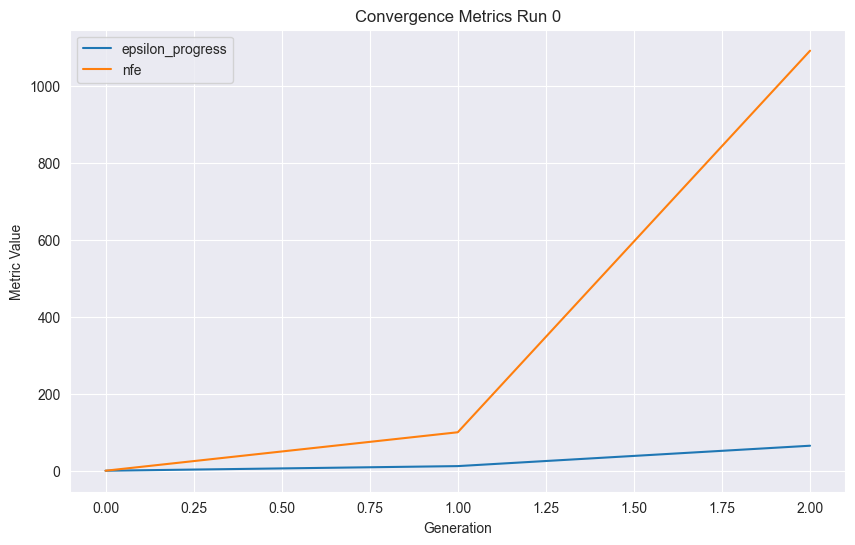

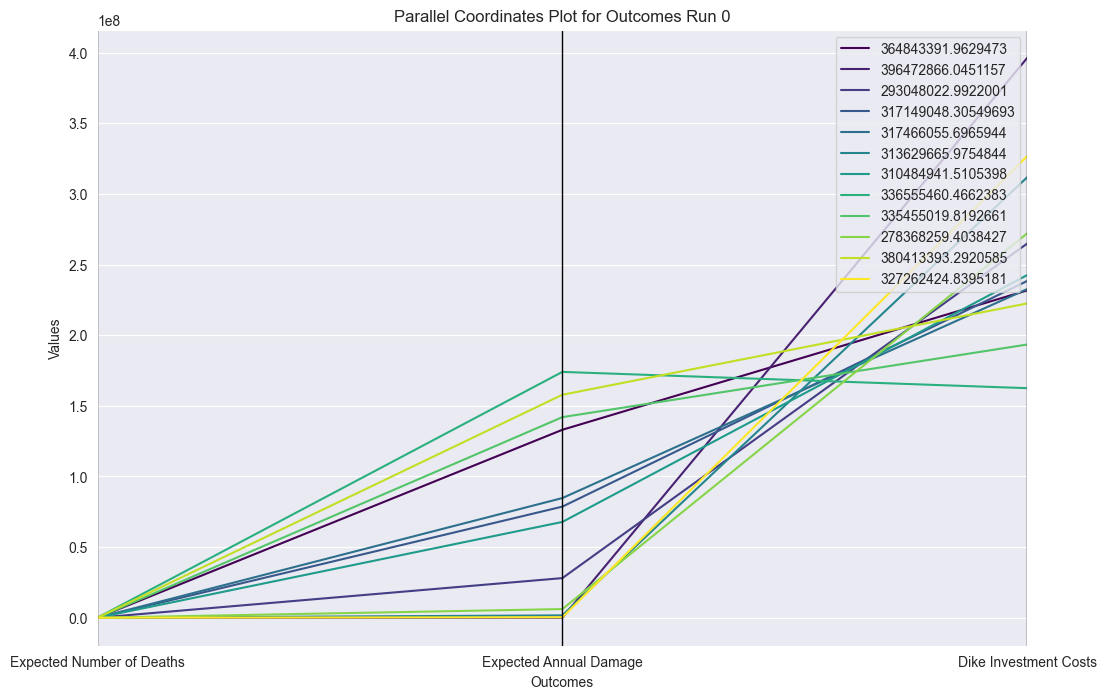

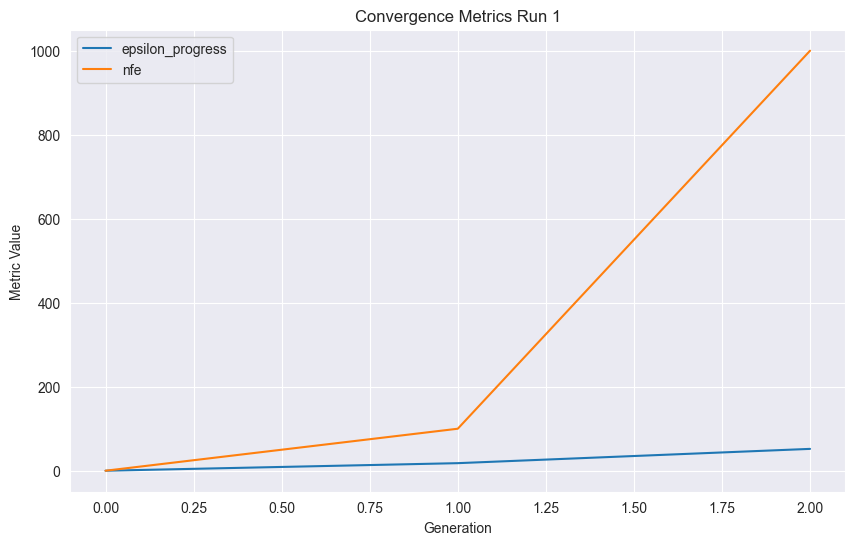

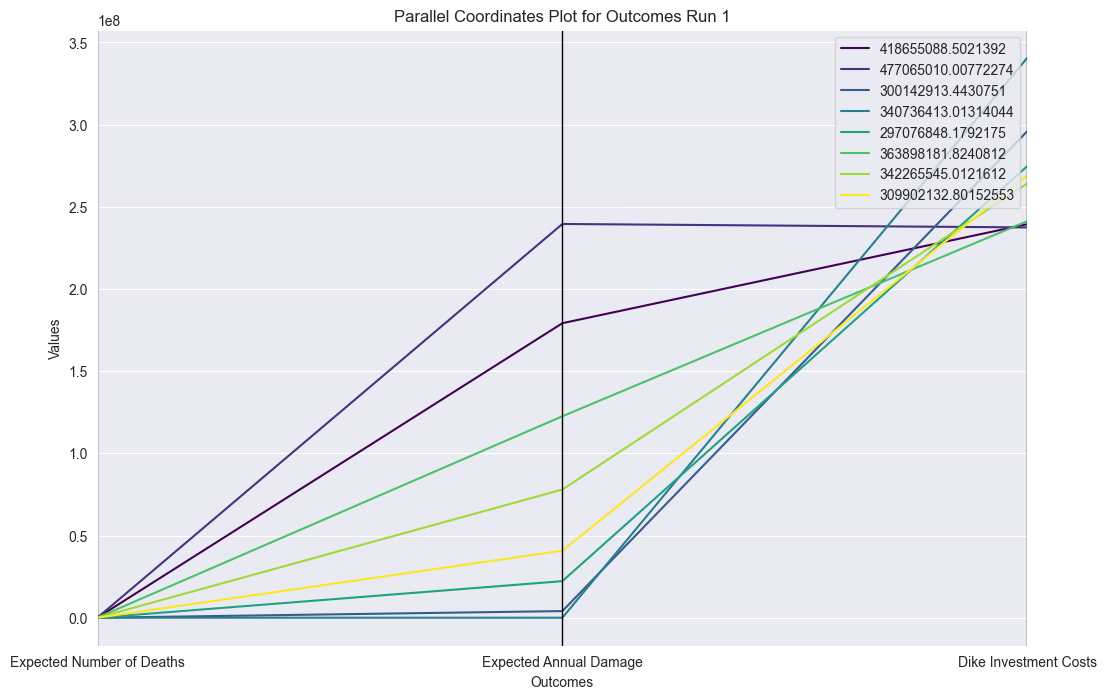

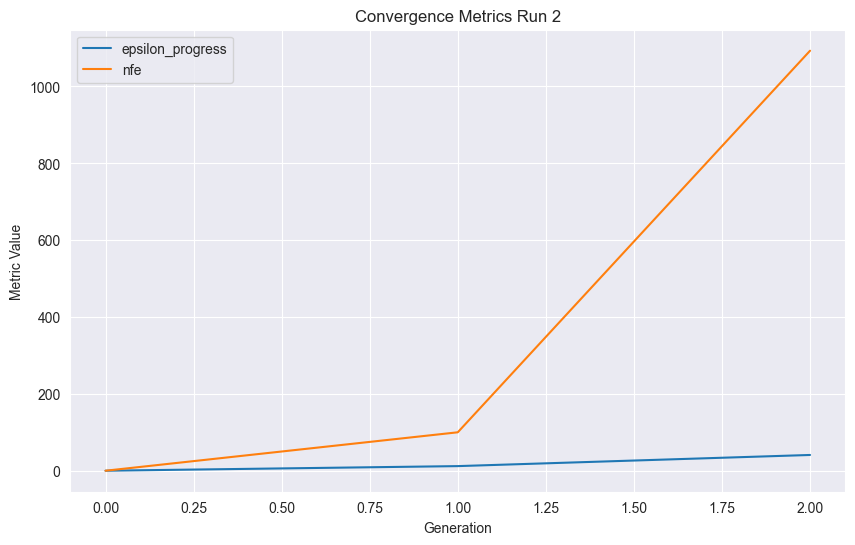

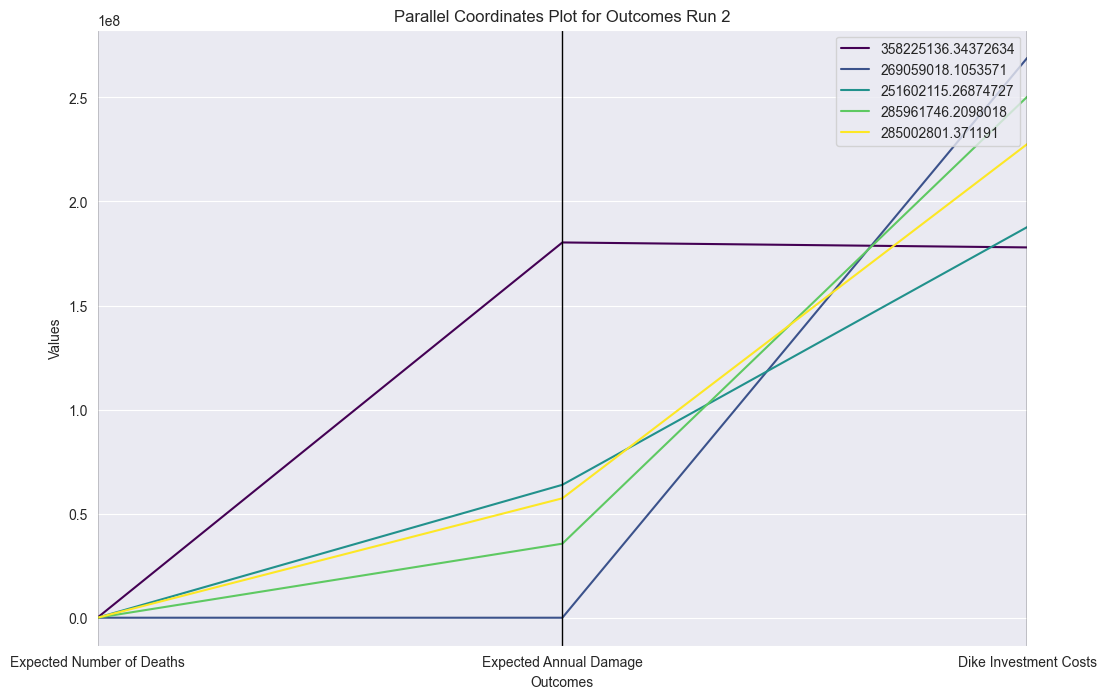

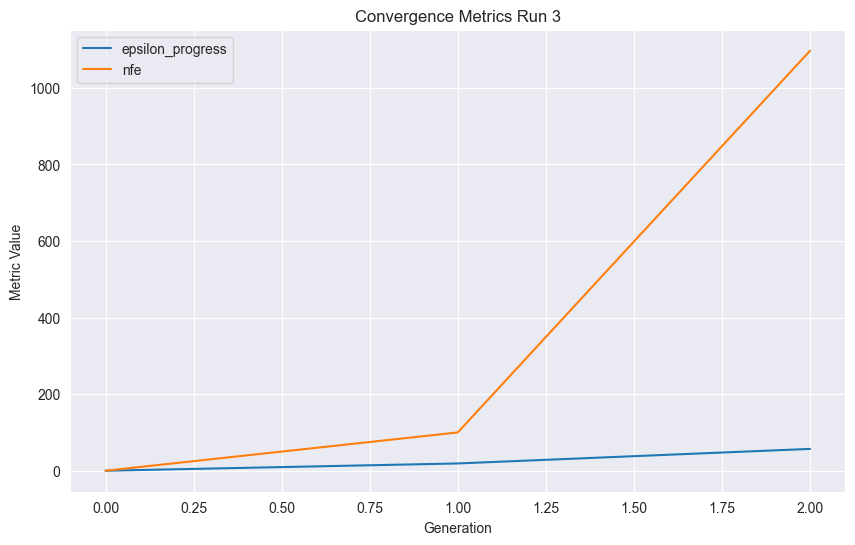

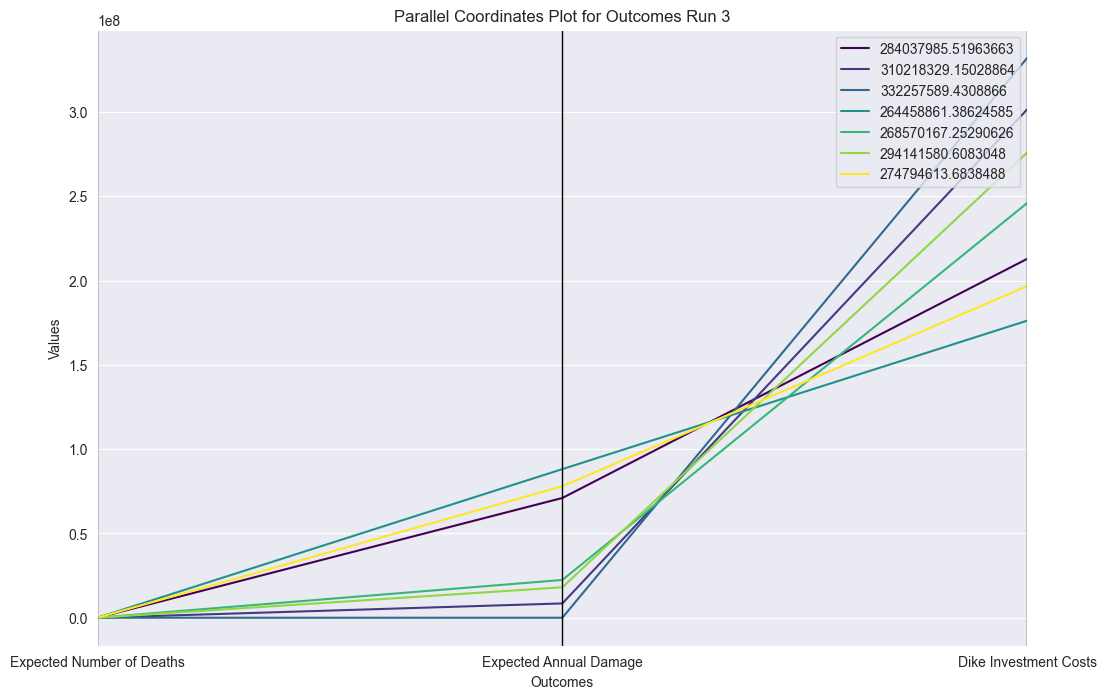

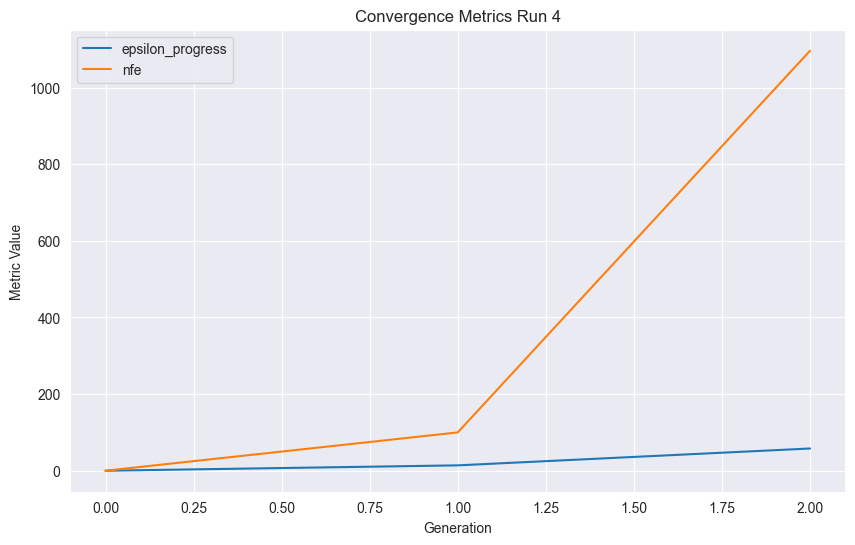

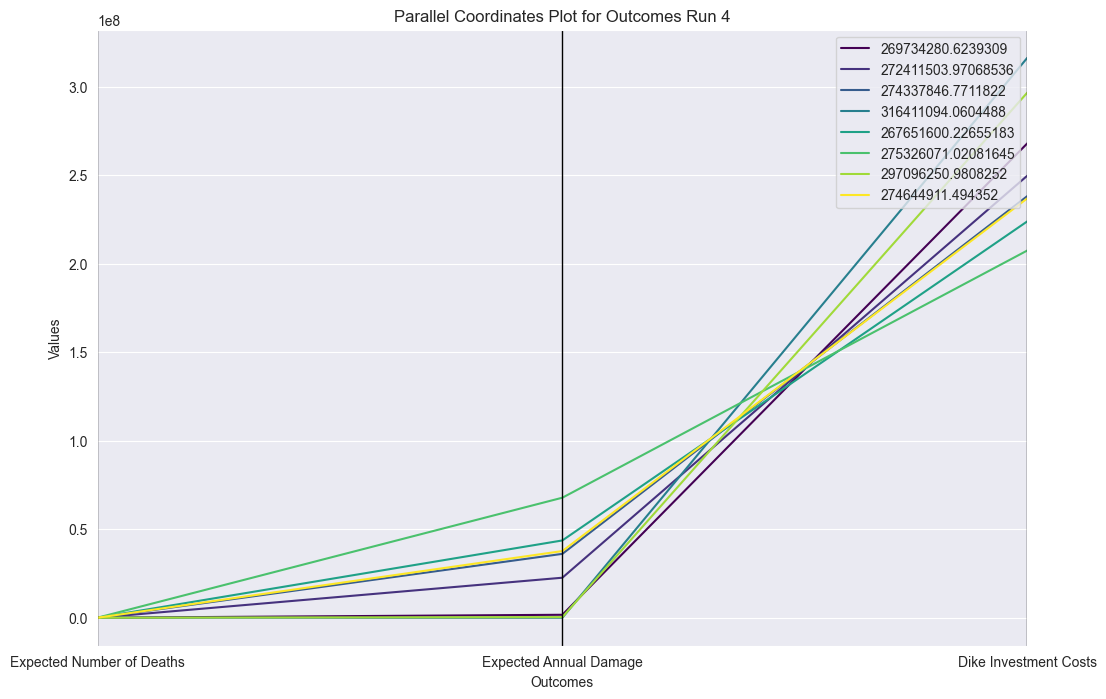

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import (
    HypervolumeMetric,
    GenerationalDistanceMetric,
    EpsilonIndicatorMetric,
    InvertedGenerationalDistanceMetric,
    SpacingMetric,
)
from ema_workbench.em_framework.optimization import to_problem

# Load convergence metrics
convergence = pd.read_csv('convergence_metrics_singlerun.csv')

# Load archives
archives = ArchiveLogger.load_archives(f"./archives/single_run.tar.gz")

# Prepare the data
for key in archives:
    archives[key] = archives[key].drop('Unnamed: 0', axis=1)

reference_set = archives[max(archives.keys())]  # this is the final archive

# Calculate metrics
def calculate_metrics(archives, reference_set):
    problem = to_problem(dike_model, searchover="levers")

    hv = HypervolumeMetric(reference_set, problem)
    gd = GenerationalDistanceMetric(reference_set, problem, d=1)
    ei = EpsilonIndicatorMetric(reference_set, problem)
    ig = InvertedGenerationalDistanceMetric(reference_set, problem, d=1)
    sm = SpacingMetric(problem)

    metrics = []
    for nfe, archive in archives.items():
        scores = {
            "generational_distance": gd.calculate(archive),
            "hypervolume": hv.calculate(archive),
            "epsilon_indicator": ei.calculate(archive),
            "inverted_gd": ig.calculate(archive),
            "spacing": sm.calculate(archive),
            "nfe": int(nfe),
        }
        metrics.append(scores)
    metrics = pd.DataFrame.from_dict(metrics)

    # sort metrics by number of function evaluations
    metrics.sort_values(by="nfe", inplace=True)
    return metrics

metrics = calculate_metrics(archives, reference_set)

# Plot metrics
def plot_metrics(metrics, convergence):
    sns.set_style("white")
    fig, axes = plt.subplots(nrows=6, figsize=(8, 12), sharex=True)

    ax1, ax2, ax3, ax4, ax5, ax6 = axes

    ax1.plot(metrics.nfe, metrics.hypervolume)
    ax1.set_ylabel("hypervolume")

    ax2.plot(convergence.nfe, convergence.epsilon_progress)
    ax2.set_ylabel("$\epsilon$ progress")

    ax3.plot(metrics.nfe, metrics.generational_distance)
    ax3.set_ylabel("generational distance")

    ax4.plot(metrics.nfe, metrics.epsilon_indicator)
    ax4.set_ylabel("epsilon indicator")

    ax5.plot(metrics.nfe, metrics.inverted_gd)
    ax5.set_ylabel("inverted generational\ndistance")

    ax6.plot(metrics.nfe, metrics.spacing)
    ax6.set_ylabel("spacing")

    ax6.set_xlabel("nfe")

    sns.despine(fig)

# Plot the metrics
plot_metrics(metrics, convergence)

plt.show()
